In [1]:
import numpy as np
import pandas as pd

In [2]:
# Assuming the files are named 'Train.csv' and 'Test.csv' and are in the same folder as the notebook
train_file_path = 'Train.csv'
test_file_path = 'Test.csv'

# Read the CSV files into Pandas DataFrames
df_Train = pd.read_csv(train_file_path)
df_Test = pd.read_csv(test_file_path)

In [ ]:
#Exploratory Data Analysis

In [3]:
df_Train.head()
df_Train.info()
df_Train.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   INCIDENT_ID       23856 non-null  object 
 1   DATE              23856 non-null  object 
 2   X_1               23856 non-null  int64  
 3   X_2               23856 non-null  int64  
 4   X_3               23856 non-null  int64  
 5   X_4               23856 non-null  int64  
 6   X_5               23856 non-null  int64  
 7   X_6               23856 non-null  int64  
 8   X_7               23856 non-null  int64  
 9   X_8               23856 non-null  int64  
 10  X_9               23856 non-null  int64  
 11  X_10              23856 non-null  int64  
 12  X_11              23856 non-null  int64  
 13  X_12              23674 non-null  float64
 14  X_13              23856 non-null  int64  
 15  X_14              23856 non-null  int64  
 16  X_15              23856 non-null  int64 

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
count,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23674.000000,23856.000000,23856.000000,23856.000000,23856.000000
mean,0.483778,24.791206,24.637450,4.276744,2.455609,6.154175,4.876509,0.972460,4.924128,1.244802,206.954519,0.974064,85.237383,72.674296,33.464747,0.955231
std,1.439738,15.240231,15.135093,2.944672,1.963095,4.471756,3.881931,1.453144,1.362625,1.119301,93.033348,1.167725,27.597226,43.297320,8.386834,0.206800
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000,1.000000
50%,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000,1.000000
75%,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000,1.000000
max,7.000000,52.000000,52.000000,10.000000,5.000000,19.000000,18.000000,99.000000,6.000000,90.000000,332.000000,90.000000,116.000000,142.000000,50.000000,1.000000


In [4]:
df_Train.shape
df_Test.shape
df_Train.isnull().sum()
df_Test.isnull().sum()


INCIDENT_ID      0
DATE             0
X_1              0
X_2              0
X_3              0
X_4              0
X_5              0
X_6              0
X_7              0
X_8              0
X_9              0
X_10             0
X_11             0
X_12           127
X_13             0
X_14             0
X_15             0
dtype: int64

In [5]:
df_Train.columns
df_Train['MULTIPLE_OFFENSE'].value_counts()


1    22788
0     1068
Name: MULTIPLE_OFFENSE, dtype: int64

In [ ]:
#FEATURE ENGINEERING

In [6]:
df_Train.shape
df_Train = df_Train.drop(['INCIDENT_ID', 'DATE'], axis=1)
df_Train.drop_duplicates(keep='first', inplace=True)
df_Train.shape
df_Train['MULTIPLE_OFFENSE'].value_counts()
df_Train.isnull().sum()

X_1                   0
X_2                   0
X_3                   0
X_4                   0
X_5                   0
X_6                   0
X_7                   0
X_8                   0
X_9                   0
X_10                  0
X_11                  0
X_12                141
X_13                  0
X_14                  0
X_15                  0
MULTIPLE_OFFENSE      0
dtype: int64

In [ ]:
#Imputation of Missing Values

In [7]:
df_Train.isnull().sum()

df_Train['X_12'] = df_Train['X_12'].ffill()
df_Test['X_12'] = df_Test['X_12'].ffill()
df_Train['X_12'] = df_Train['X_12'].bfill()
df_Test['X_12'] = df_Test['X_12'].bfill()

df_Train.isnull().sum()

X_1                 0
X_2                 0
X_3                 0
X_4                 0
X_5                 0
X_6                 0
X_7                 0
X_8                 0
X_9                 0
X_10                0
X_11                0
X_12                0
X_13                0
X_14                0
X_15                0
MULTIPLE_OFFENSE    0
dtype: int64

In [8]:
#Convert to integer
df_Train['X_12'] = df_Train['X_12'].astype(int)
df_Test['X_12'] = df_Test['X_12'].astype(int)

df_Train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18814 entries, 0 to 23854
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   X_1               18814 non-null  int64
 1   X_2               18814 non-null  int64
 2   X_3               18814 non-null  int64
 3   X_4               18814 non-null  int64
 4   X_5               18814 non-null  int64
 5   X_6               18814 non-null  int64
 6   X_7               18814 non-null  int64
 7   X_8               18814 non-null  int64
 8   X_9               18814 non-null  int64
 9   X_10              18814 non-null  int64
 10  X_11              18814 non-null  int64
 11  X_12              18814 non-null  int64
 12  X_13              18814 non-null  int64
 13  X_14              18814 non-null  int64
 14  X_15              18814 non-null  int64
 15  MULTIPLE_OFFENSE  18814 non-null  int64
dtypes: int64(16)
memory usage: 2.4 MB


In [ ]:
#FEATURE SELECTION

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<ipython-input-10-7de7bab684d3>:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for colname, colvalue in df_Train.iteritems():


<Axes: title={'center': 'Pearson Correlation of features'}>

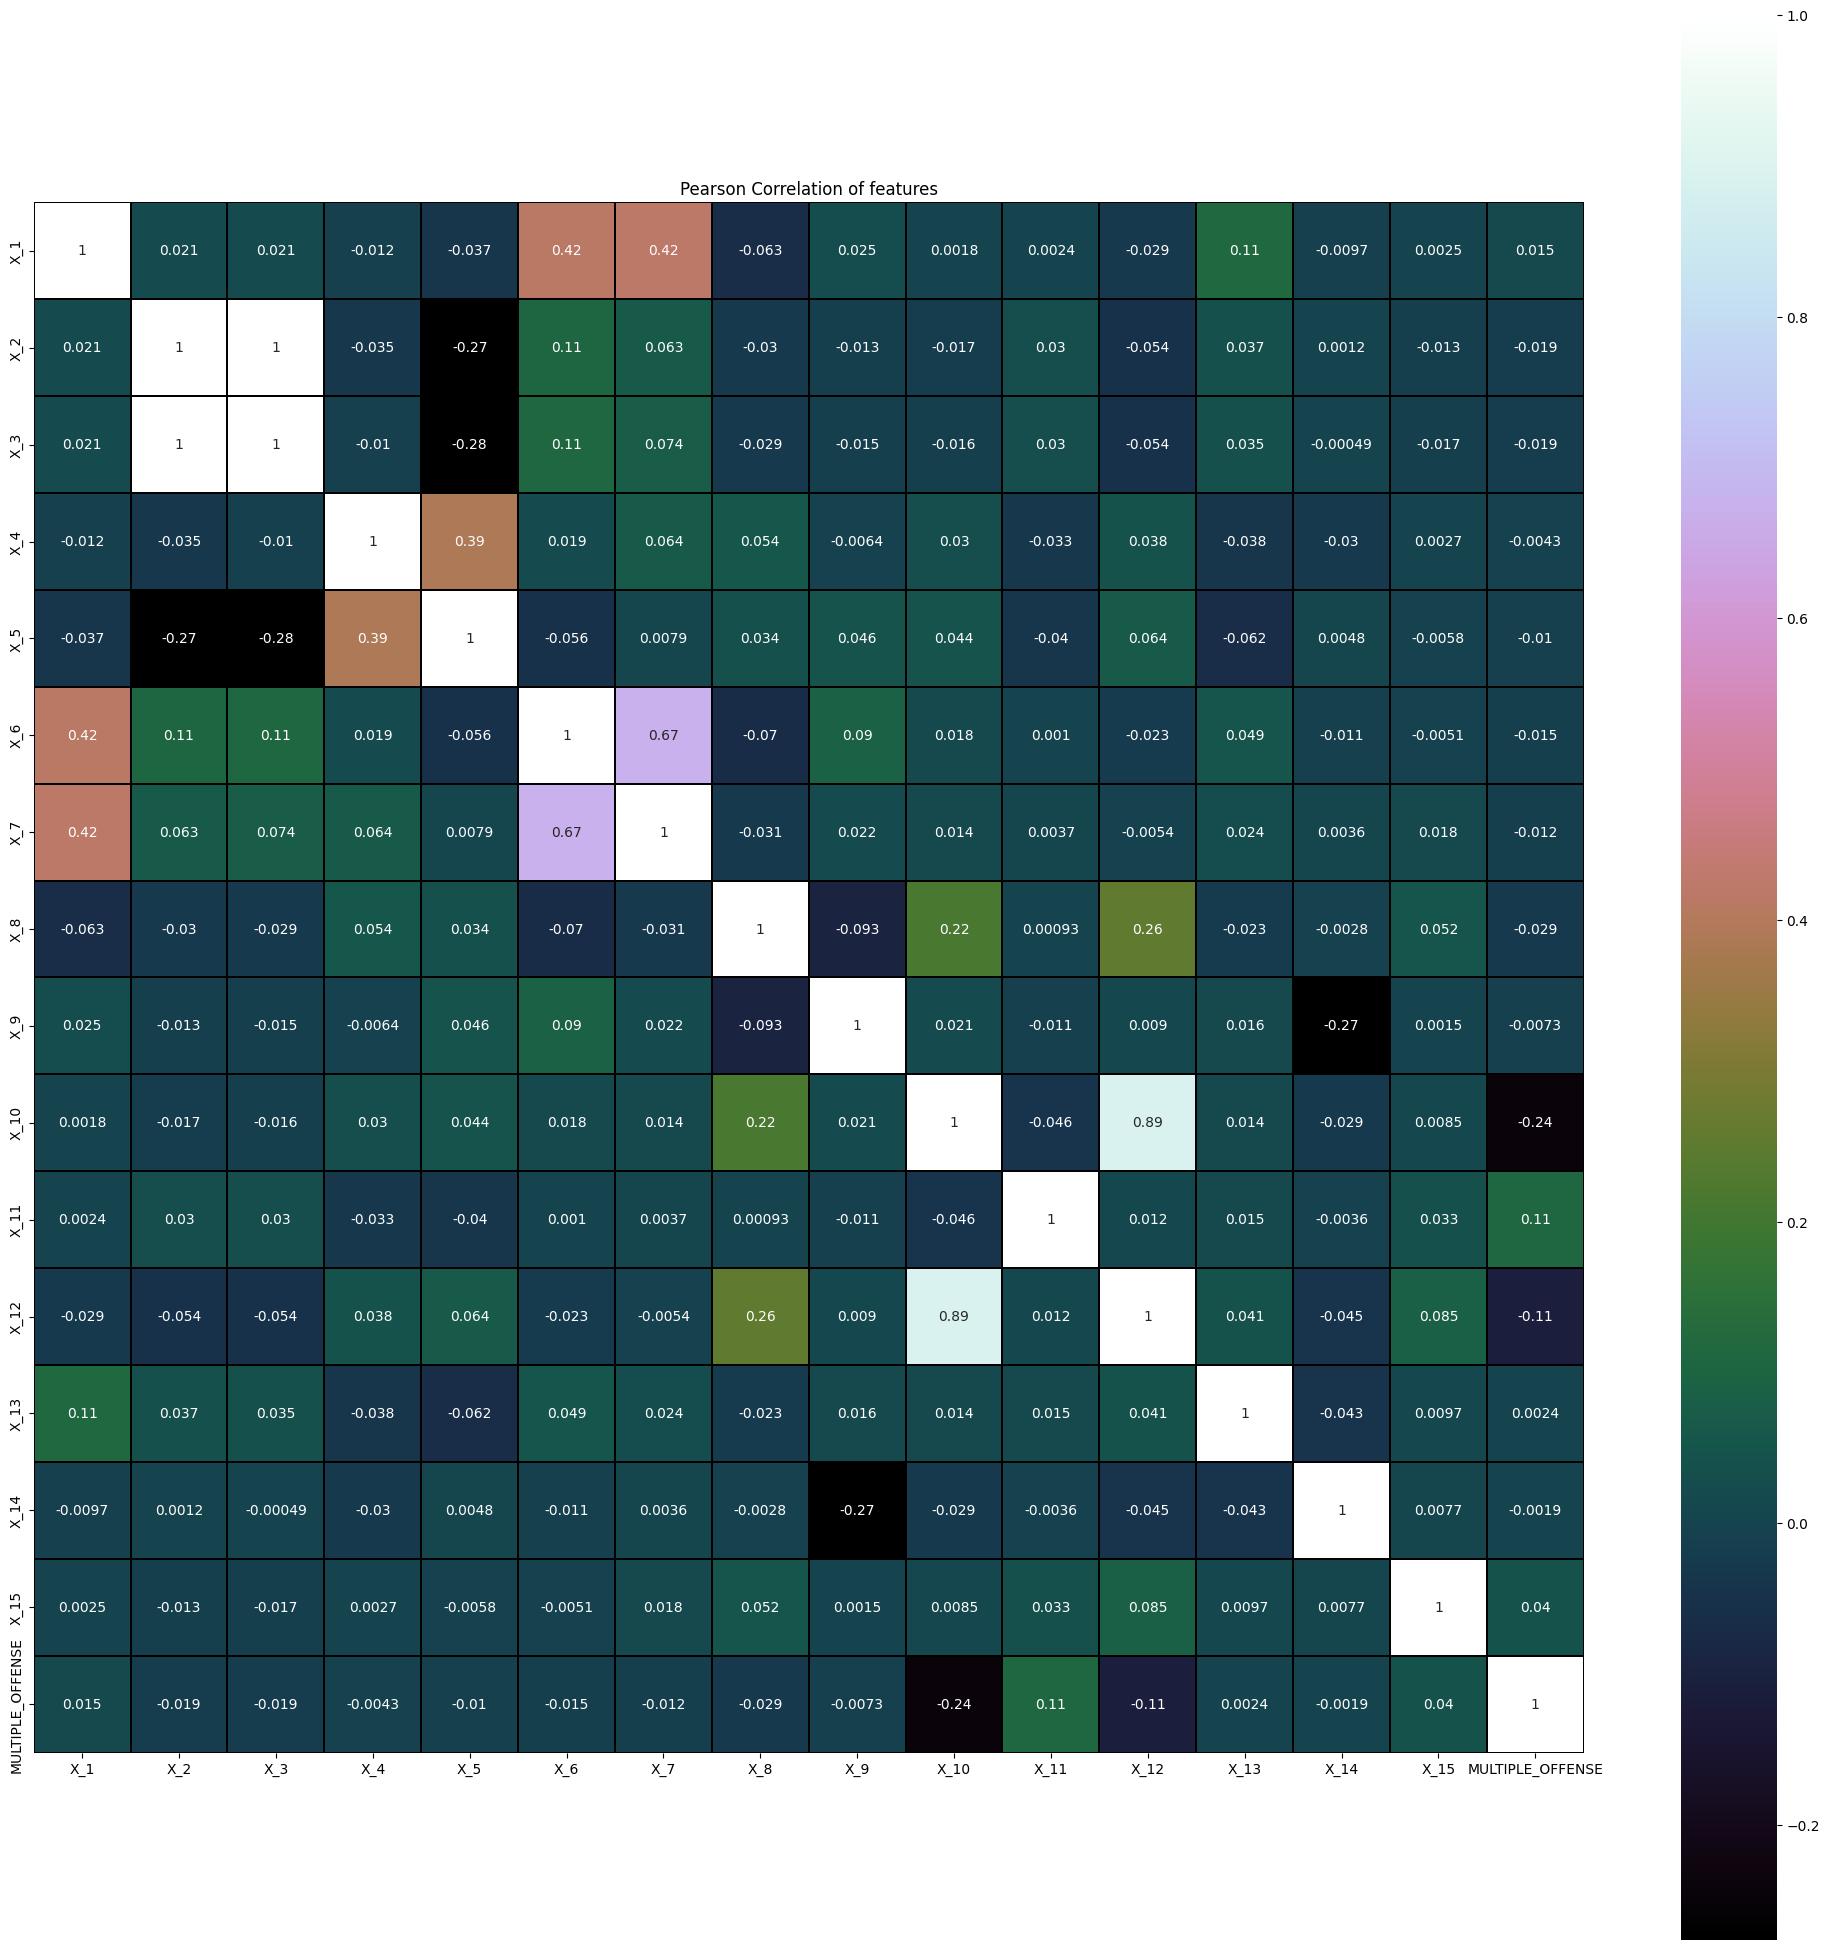

In [10]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in df_Train.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion
num_list = df_Train.columns.difference(str_list)
# Create Dataframe containing only numerical features
train_num = df_Train[num_list]
f, ax = plt.subplots(figsize=(25, 25))
plt.title('Pearson Correlation of features')
# Draw the heatmap using seaborn
sns.heatmap(train_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)

In [11]:
df_Train.corr()


,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
X_1,1.000000,0.020915,0.020678,-0.011969,-0.036969,0.415254,0.419761,-0.063110,0.024894,0.001782,0.002431,-0.028958,0.113617,-0.009718,0.002470,0.014948
X_2,0.020915,1.000000,0.997183,-0.034701,-0.273796,0.106539,0.063355,-0.030287,-0.013057,-0.017373,0.030416,-0.053886,0.036968,0.001156,-0.012961,-0.018676
X_3,0.020678,0.997183,1.000000,-0.010006,-0.276232,0.110816,0.073723,-0.028750,-0.014570,-0.016438,0.029520,-0.053619,0.035184,-0.000493,-0.016719,-0.018770
X_4,-0.011969,-0.034701,-0.010006,1.000000,0.390439,0.018748,0.063802,0.054493,-0.006397,0.030263,-0.033334,0.038373,-0.038341,-0.030230,0.002711,-0.004253
X_5,-0.036969,-0.273796,-0.276232,0.390439,1.000000,-0.055987,0.007925,0.034433,0.046320,0.044109,-0.040316,0.063665,-0.061932,0.004751,-0.005812,-0.010082
X_6,0.415254,0.106539,0.110816,0.018748,-0.055987,1.000000,0.673273,-0.070119,0.089650,0.017857,0.001035,-0.022657,0.049451,-0.010615,-0.005076,-0.015254
X_7,0.419761,0.063355,0.073723,0.063802,0.007925,0.673273,1.000000,-0.030933,0.021767,0.014279,0.003719,-0.005375,0.024217,0.003617,0.017528,-0.012324
X_8,-0.063110,-0.030287,-0.028750,0.054493,0.034433,-0.070119,-0.030933,1.000000,-0.093292,0.215793,0.000934,0.255208,-0.023318,-0.002788,0.051776,-0.029485
X_9,0.024894,-0.013057,-0.014570,-0.006397,0.046320,0.089650,0.021767,-0.093292,1.000000,0.020867,-0.011426,0.008988,0.016483,-0.272443,0.001514,-0.007291
X_10,0.001782,-0.017373,-0.016438,0.030263,0.044109,0.017857,0.014279,0.215793,0.020867,1.000000,-0.046466,0.890416,0.013661,-0.028526,0.008544,-0.242552


<Axes: >

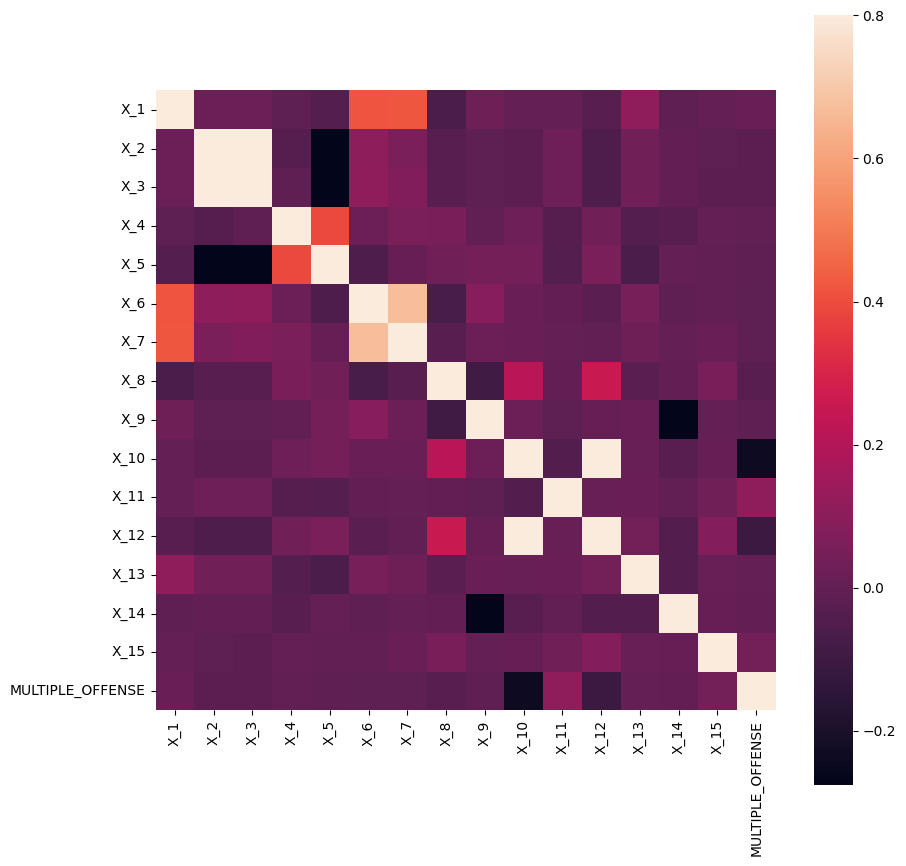

In [12]:
corrmat = df_Train.corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corrmat, square=True, vmax=.8)

In [13]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [14]:
df_multi = df_Train
df_multi = df_multi.drop('MULTIPLE_OFFENSE', axis=1)

In [15]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_multi.values, i) for i in range(df_multi.shape[1])]
vif["features"] = df_multi.columns

In [16]:
vif.round(1)

,VIF Factor,features
0,1.4,X_1
1,743.4,X_2
2,750.3,X_3
3,4.3,X_4
4,3.5,X_5
5,6.0,X_6
6,5.3,X_7
7,1.6,X_8
8,10.1,X_9
9,10.3,X_10


In [ ]:
#DATA MODELLING FOR PREDICTION

In [17]:
x = df_Train
x = x.drop(['MULTIPLE_OFFENSE'], axis=1)
y = df_Train['MULTIPLE_OFFENSE']
x_pred = df_Test
x_pred = x_pred.drop(['INCIDENT_ID', 'DATE'], axis=1)

In [18]:
from imblearn.over_sampling import RandomOverSampler
sm = RandomOverSampler(random_state=294,sampling_strategy='not majority')
x_sm, y_sm = sm.fit_resample(x,y)
x_sm = pd.DataFrame(x_sm)
x_sm.columns = x.columns

In [ ]:
#RANDOM FOREST MODEL

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000, criterion='entropy', n_jobs=-1, random_state=294)

In [20]:
rf.fit(x_sm,np.ravel(y_sm))

RandomForestClassifier(criterion='entropy', n_estimators=1000, n_jobs=-1,
                       random_state=294)

In [21]:
y_pred = rf.predict(x_pred)

In [22]:
submission_df = pd.DataFrame({'INCIDENT_ID':df_Test['INCIDENT_ID'], 'MULTIPLE_OFFENSE':y_pred})
submission_df.to_csv('Sample Submission RF v1.csv', index=False)

In [ ]:
#CATBOOST CLASSFICATION MODEL

In [ ]:
!pip install catboost

In [24]:
from catboost import CatBoostClassifier
cb_cl = CatBoostClassifier(learning_rate=0.15, n_estimators=500, subsample=0.70, max_depth=5, scale_pos_weight=2.5)

In [25]:
cb_cl.fit(x_sm,np.ravel(y_sm))


0:	learn: 0.4489990	total: 87.6ms	remaining: 43.7s
1:	learn: 0.3073769	total: 102ms	remaining: 25.4s
2:	learn: 0.2393709	total: 112ms	remaining: 18.6s
3:	learn: 0.1867240	total: 129ms	remaining: 16s
4:	learn: 0.1462948	total: 143ms	remaining: 14.1s
5:	learn: 0.1242510	total: 155ms	remaining: 12.7s
6:	learn: 0.1104699	total: 173ms	remaining: 12.2s
7:	learn: 0.0996096	total: 200ms	remaining: 12.3s
8:	learn: 0.0873745	total: 210ms	remaining: 11.5s
9:	learn: 0.0809710	total: 223ms	remaining: 10.9s
10:	learn: 0.0756551	total: 248ms	remaining: 11s
11:	learn: 0.0689929	total: 292ms	remaining: 11.9s
12:	learn: 0.0641982	total: 304ms	remaining: 11.4s
13:	learn: 0.0602425	total: 314ms	remaining: 10.9s
14:	learn: 0.0547867	total: 325ms	remaining: 10.5s
15:	learn: 0.0510892	total: 343ms	remaining: 10.4s
16:	learn: 0.0487983	total: 373ms	remaining: 10.6s
17:	learn: 0.0439177	total: 395ms	remaining: 10.6s
18:	learn: 0.0400675	total: 407ms	remaining: 10.3s
19:	learn: 0.0363410	total: 425ms	remaining:

In [26]:
y_pred = cb_cl.predict(x_pred)


In [27]:
submission_df = pd.DataFrame({'INCIDENT_ID':df_Test['INCIDENT_ID'], 'MULTIPLE_OFFENSE':y_pred})
submission_df.to_csv('Sample Submission CB v1.csv', index=False)

In [ ]:
#XGBoost Model
#Accuracy: 0.9994340690435767

In [28]:
from xgboost import XGBClassifier

# Initialize the XGBoost model with similar parameters
xgb_model = XGBClassifier(
    learning_rate=0.15,
    n_estimators=500,
    subsample=0.70,
    max_depth=5,
    scale_pos_weight=2.5,
    use_label_encoder=False,
    eval_metric='logloss',  # To avoid a deprecation warning from XGBoost
    random_state=294  # For reproducibility, if needed
)

# Fit the model on the oversampled training data
xgb_model.fit(x_sm, np.ravel(y_sm))

# Predict on the test set
y_pred = xgb_model.predict(x_pred)

# Prepare the submission file
submission_df = pd.DataFrame({'INCIDENT_ID': df_Test['INCIDENT_ID'], 'MULTIPLE_OFFENSE': y_pred})
submission_df.to_csv('Sample_Submission_XGB_v1.csv', index=False)

In [29]:
import pandas as pd
main_file_path = 'Sample Submission CB v1.csv'
submission_file_path = 'Sample_Submission_XGB_v1.csv'
main_df = pd.read_csv(main_file_path)
submission_df = pd.read_csv(submission_file_path)
# Calculate accuracy
accuracy = np.mean(main_df['MULTIPLE_OFFENSE'] == submission_df['MULTIPLE_OFFENSE'])
print('Accuracy:', accuracy)


Accuracy: 0.9994340690435767


In [ ]:
#GRADIENT BOOSTING
#Accuracy: 0.9994340690435767

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting model with similar parameters
gb_cl = GradientBoostingClassifier(
    learning_rate=0.15,
    n_estimators=500,
    subsample=0.70,
    max_depth=5,
    # Scikit-learn's GradientBoosting doesn't have an equivalent to scale_pos_weight directly.
    # You might handle class imbalance externally before training.
    random_state=294  # For reproducibility, if needed
)

# Fit the model on the oversampled training data
gb_cl.fit(x_sm, np.ravel(y_sm))

# Predict on the test set
y_pred = gb_cl.predict(x_pred)

# Prepare the submission file
submission_df = pd.DataFrame({'INCIDENT_ID': df_Test['INCIDENT_ID'], 'MULTIPLE_OFFENSE': y_pred})
submission_df.to_csv('Sample_Submission_GB_v1.csv', index=False)


In [31]:
import pandas as pd
main_file_path = 'Sample Submission CB v1.csv'
submission_file_path = 'Sample_Submission_GB_v1.csv'
main_df = pd.read_csv(main_file_path)
submission_df = pd.read_csv(submission_file_path)
# Calculate accuracy
accuracy = np.mean(main_df['MULTIPLE_OFFENSE'] == submission_df['MULTIPLE_OFFENSE'])
print('Accuracy:', accuracy)


Accuracy: 0.9994340690435767


In [ ]:
#LIGHTGBM MODEL
#Accuracy: 0.9992454253914356

In [ ]:
import lightgbm as lgb

# Initialize the LightGBM model with similar parameters
lgb_cl = lgb.LGBMClassifier(
    learning_rate=0.15,
    n_estimators=500,
    subsample=0.70,
    max_depth=5,
    scale_pos_weight=2.5,  # LightGBM supports scale_pos_weight for imbalanced data
    random_state=294  # For reproducibility, if needed
)

# Fit the model on the oversampled training data
lgb_cl.fit(x_sm, np.ravel(y_sm))

# Predict on the test set
y_pred = lgb_cl.predict(x_pred)

# Prepare the submission file
submission_df = pd.DataFrame({'INCIDENT_ID': df_Test['INCIDENT_ID'], 'MULTIPLE_OFFENSE': y_pred})
submission_df.to_csv('Sample_Submission_LGBM_v1.csv', index=False)

In [33]:
import pandas as pd
main_file_path = 'Sample Submission CB v1.csv'
submission_file_path = 'Sample_Submission_LGBM_v1.csv'
main_df = pd.read_csv(main_file_path)
submission_df = pd.read_csv(submission_file_path)
# Calculate accuracy
accuracy = np.mean(main_df['MULTIPLE_OFFENSE'] == submission_df['MULTIPLE_OFFENSE'])
print('Accuracy:', accuracy)

Accuracy: 0.9992454253914356


In [ ]:
#Random Forest Model
#Accuracy: 0.9073130855813368

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model with some typical parameters
rf_cl = RandomForestClassifier(
    n_estimators=500,  # Number of trees in the forest
    criterion='entropy',  # Function to measure the quality of a split
    max_depth=5,  # Maximum depth of the tree
    random_state=294,  # For reproducibility, if needed
    n_jobs=-1  # Use all processors for faster training
)

# Fit the model on the oversampled training data
rf_cl.fit(x_sm, np.ravel(y_sm))

# Predict on the test set
y_pred = rf_cl.predict(x_pred)

# Prepare the submission file
submission_df = pd.DataFrame({'INCIDENT_ID': df_Test['INCIDENT_ID'], 'MULTIPLE_OFFENSE': y_pred})
submission_df.to_csv('Sample_Submission_RF_v1.csv', index=False)

In [35]:
import pandas as pd
main_file_path = 'Sample Submission CB v1.csv'
submission_file_path = 'Sample_Submission_RF_v1.csv'
main_df = pd.read_csv(main_file_path)
submission_df = pd.read_csv(submission_file_path)
# Calculate accuracy
accuracy = np.mean(main_df['MULTIPLE_OFFENSE'] == submission_df['MULTIPLE_OFFENSE'])
print('Accuracy:', accuracy)

Accuracy: 0.9073130855813368


In [ ]:
#Neural Networks
#Accuracy: 0.9651638055712759

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

# Preprocess the data: Neural networks perform better on scaled data
scaler = StandardScaler()
x_sm_scaled = scaler.fit_transform(x_sm)
x_pred_scaled = scaler.transform(x_pred)

# Convert the target variable to categorical (one-hot encoding) for multi-class classification
y_sm_categorical = to_categorical(y_sm)

# Define the model
model = Sequential()
model.add(Dense(64, input_dim=x_sm_scaled.shape[1], activation='relu'))  # Input layer and first hidden layer with 64 nodes
model.add(Dropout(0.5))  # Dropout layer to prevent overfitting
model.add(Dense(32, activation='relu'))  # Second hidden layer
model.add(Dense(y_sm_categorical.shape[1], activation='softmax'))  # Output layer with softmax activation

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_sm_scaled, y_sm_categorical, epochs=100, batch_size=32)

# Predict on the test set
y_pred_prob = model.predict(x_pred_scaled)  # This will give you probabilities for each class
y_pred = y_pred_prob.argmax(axis=-1)  # Convert probabilities to class labels

# Prepare the submission file
submission_df = pd.DataFrame({'INCIDENT_ID': df_Test['INCIDENT_ID'], 'MULTIPLE_OFFENSE': y_pred})
submission_df.to_csv('Sample_Submission_NN_v1.csv', index=False)

Epoch 1/100
1115/1115 [==============================] - 5s 3ms/step - loss: 0.4152 - accuracy: 0.8178
Epoch 2/100
1115/1115 [==============================] - 2s 2ms/step - loss: 0.2555 - accuracy: 0.9023
Epoch 3/100
1115/1115 [==============================] - 2s 2ms/step - loss: 0.2224 - accuracy: 0.9143
Epoch 4/100
1115/1115 [==============================] - 2s 2ms/step - loss: 0.2039 - accuracy: 0.9190
Epoch 5/100
1115/1115 [==============================] - 2s 2ms/step - loss: 0.1884 - accuracy: 0.9249
Epoch 6/100
1115/1115 [==============================] - 2s 2ms/step - loss: 0.1735 - accuracy: 0.9285
Epoch 7/100
1115/1115 [==============================] - 3s 2ms/step - loss: 0.1657 - accuracy: 0.9321
Epoch 8/100
1115/1115 [==============================] - 2s 2ms/step - loss: 0.1594 - accuracy: 0.9335
Epoch 9/100
1115/1115 [==============================] - 2s 2ms/step - loss: 0.1542 - accuracy: 0.9370
Epoch 10/100
1115/1115 [==============================] - 2s 2ms/step - l

In [ ]:
import pandas as pd
main_file_path = 'Sample Submission CB v1.csv'
submission_file_path = 'Sample_Submission_NN_v1.csv'
main_df = pd.read_csv(main_file_path)
submission_df = pd.read_csv(submission_file_path)
# Calculate accuracy
accuracy = np.mean(main_df['MULTIPLE_OFFENSE'] == submission_df['MULTIPLE_OFFENSE'])
print('Accuracy:', accuracy)

Accuracy: 0.9651638055712759


In [ ]:
#ADABOOST MODEL
#Accuracy: 0.9991825441740552

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize the AdaBoost model with a base estimator. Here, we're using a Decision Tree.
# You can adjust the base estimator and its parameters depending on the complexity of your data.
ada_cl = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=2),
    n_estimators=500,
    learning_rate=0.15,
    random_state=294
)

# Fit the model on the oversampled training data
ada_cl.fit(x_sm, np.ravel(y_sm))

# Predict on the test set
y_pred = ada_cl.predict(x_pred)

# Prepare the submission file
submission_df = pd.DataFrame({'INCIDENT_ID': df_Test['INCIDENT_ID'], 'MULTIPLE_OFFENSE': y_pred})
submission_df.to_csv('Sample_Submission_AdaBoost_v1.csv', index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
import pandas as pd
main_file_path = 'Sample Submission CB v1.csv'
submission_file_path = 'Sample_Submission_AdaBoost_v1.csv'
main_df = pd.read_csv(main_file_path)
submission_df = pd.read_csv(submission_file_path)
# Calculate accuracy
accuracy = np.mean(main_df['MULTIPLE_OFFENSE'] == submission_df['MULTIPLE_OFFENSE'])
print('Accuracy:', accuracy)

Accuracy: 0.9991825441740552


In [ ]:
#ACCURACIES FOUND

#XGBoost Model
#Accuracy: 0.9994

#GRADIENT BOOSTING
#Accuracy: 0.9994

#ADABOOST MODEL
#Accuracy: 0.9992

#LIGHTGBM MODEL
#Accuracy: 0.9993

#Random Forest Model
#Accuracy: 0.9073

#Neural Networks
#Accuracy: 0.9652

In [ ]:
#BASED ON XGBOOST MODEL'S ACCURACY, NOW WE ANALYSE WHICH COLUMNS MADE WHAT EFFECT

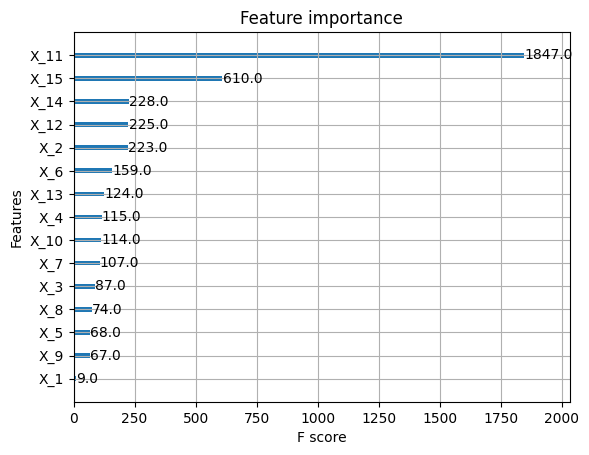

[15:49:59] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


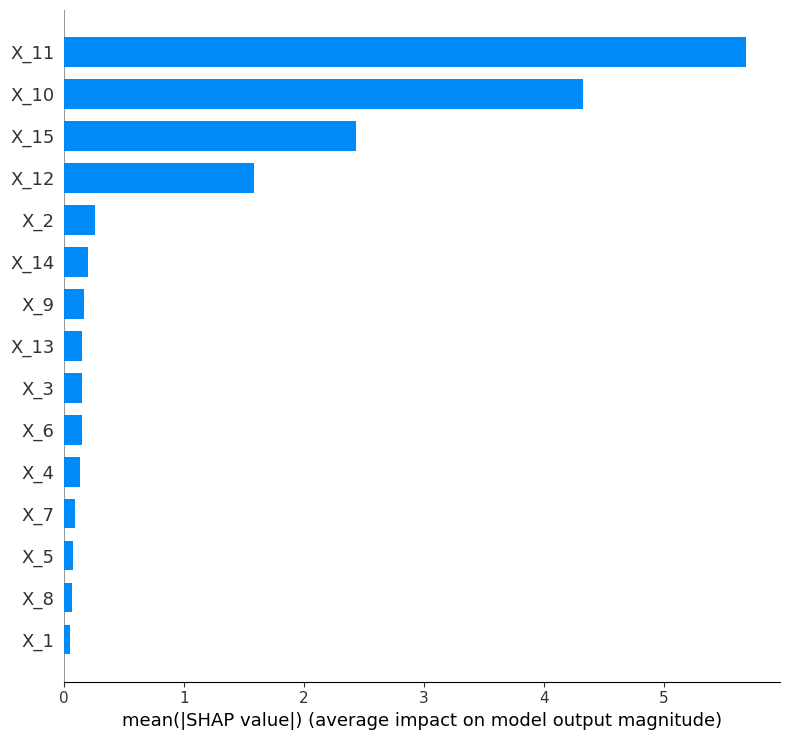

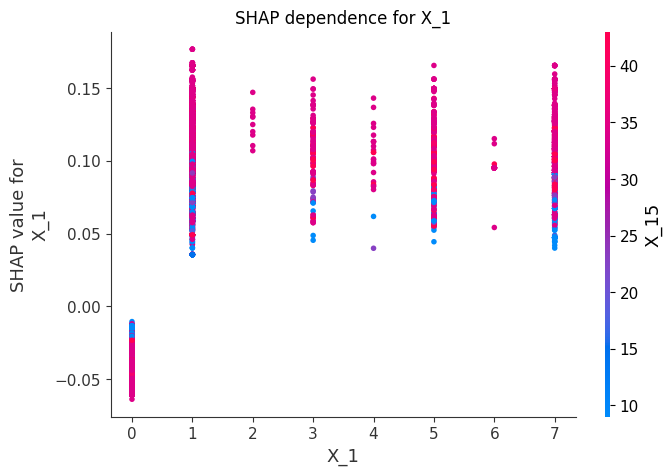

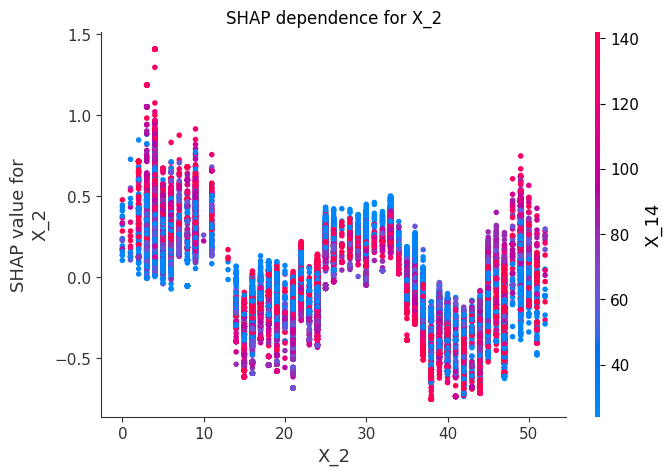

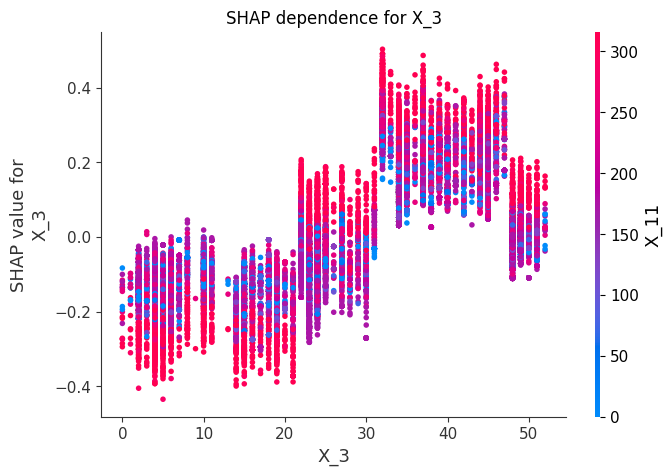

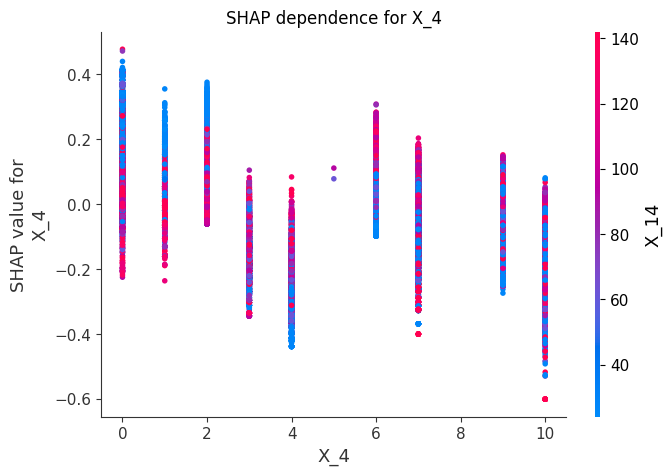

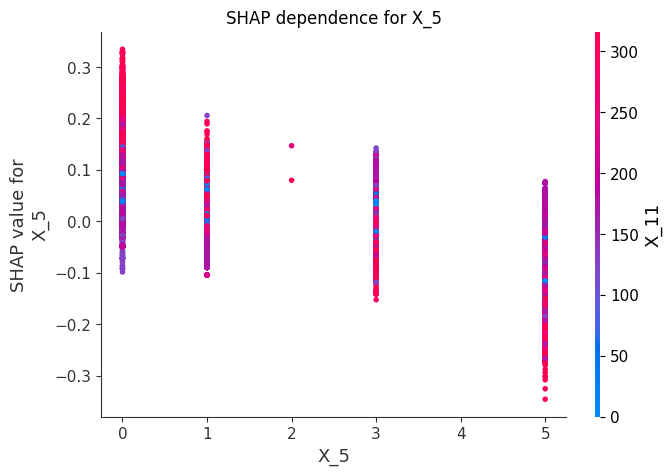

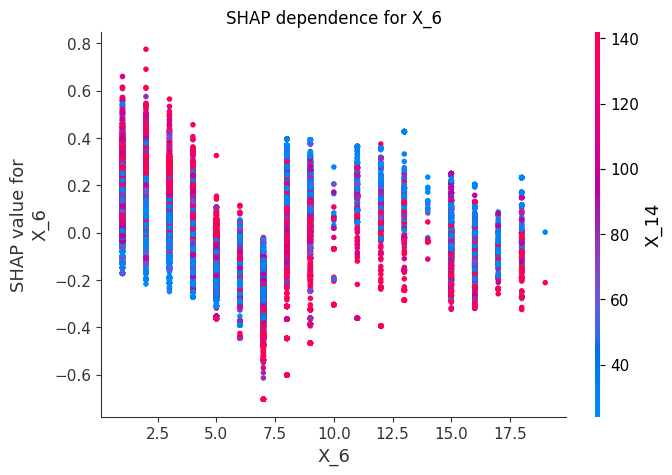

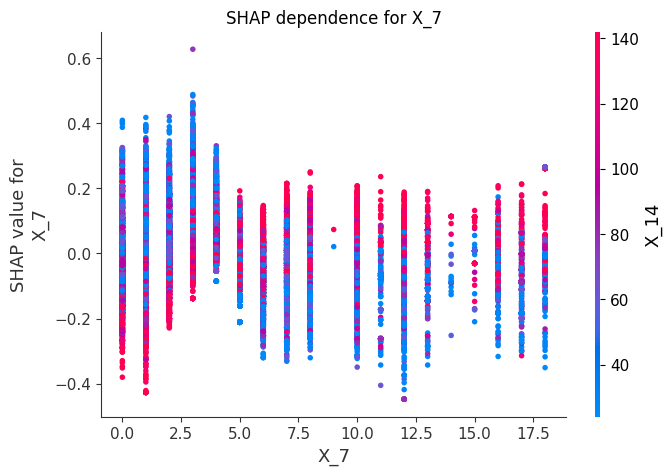

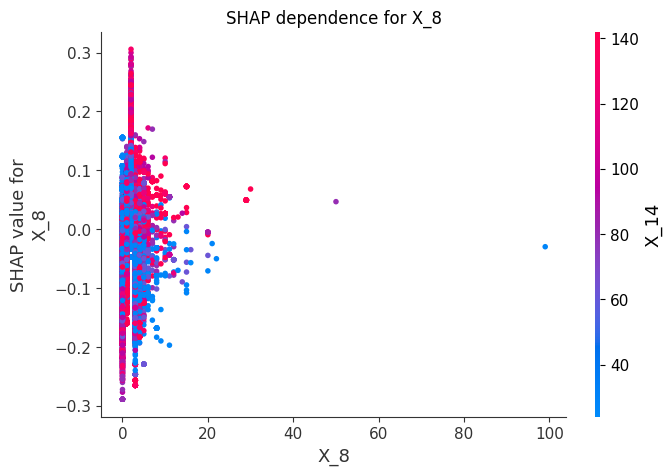

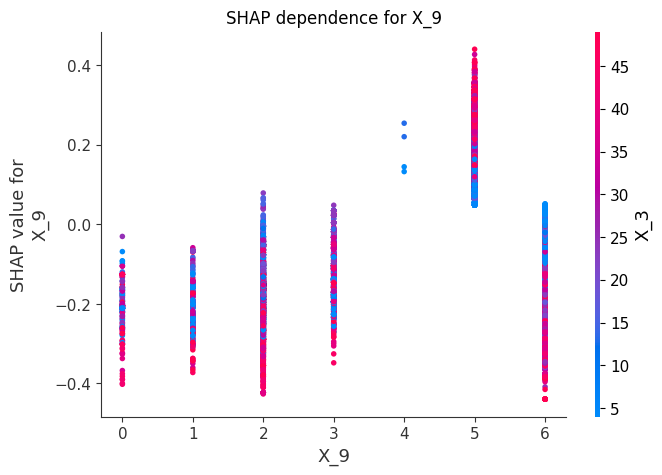

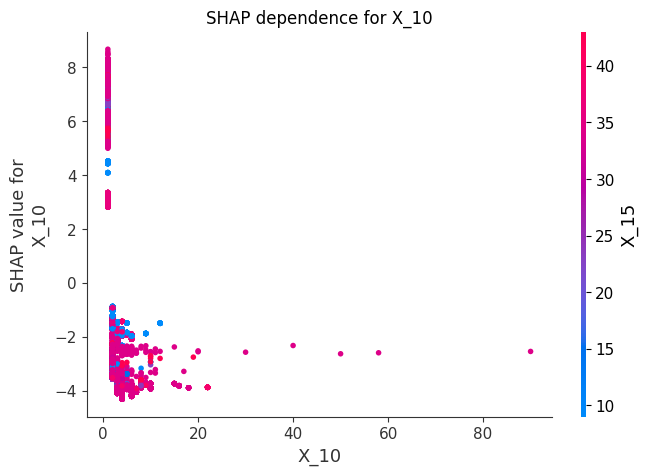

In [ ]:
import xgboost as xgb
import shap
import pandas as pd
import matplotlib.pyplot as plt

# Fit the model on the oversampled training data
xgb_model.fit(x_sm, np.ravel(y_sm))

# Feature Importance Plot
xgb.plot_importance(xgb_model)
plt.show()

# Calculate SHAP values
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(x_sm)

# Summary Plot using SHAP values
shap.summary_plot(shap_values, x_sm, plot_type="bar")

# Partial Dependence Plots for the top few features
# Adjust the number of features you want to view
top_features = x_sm.columns[:10]  # Adjust this to view more or fewer features
for feature in top_features:
    shap.dependence_plot(feature, shap_values, x_sm, show=False)
    plt.title(f'SHAP dependence for {feature}')
    plt.show()


In [ ]:
import pandas as pd

# Load the test data
test_df = pd.read_csv('Test.csv')  # Replace with your actual file path

# Load the predictions
predictions_df = pd.read_csv('Sample_Submission_XGB_v1.csv')  # Replace with your actual file path

# Merge the two DataFrames
# Ensure that both DataFrames have a common identifier column, here assumed as 'ID_column'
combined_df = test_df.merge(predictions_df, on='INCIDENT_ID', how='left')

# Save the combined DataFrame to a new CSV file
combined_df.to_csv('XG_Test_Predictions.csv', index=False)


In [ ]:
from sklearn.impute import SimpleImputer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
import xgboost as xgb
import shap
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('XG_Test_Predictions.csv')

# Check for NaNs in the original data
print("NaNs in original data:")
print(df.isnull().sum())

# Drop non-numeric columns or convert them to numeric
df = df.drop(['INCIDENT_ID', 'DATE'], axis=1)  # Adjust based on your dataset

# Separate the features and the target variable
X = df.drop('MULTIPLE_OFFENSE', axis=1)
y = df['MULTIPLE_OFFENSE']

# Impute missing values using the median for each column
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)  # Convert back to DataFrame

# Check if NaNs are present after imputation in features
print("NaNs after imputation in features:")
print(X_imputed.isnull().sum())

# Check if NaNs are present in the target variable
print("NaNs in target variable:")
print(y.isnull().sum())

# If NaNs are found in target, you might need to drop those rows or impute
if y.isnull().any():
    print("Handling NaNs in target by dropping...")
    combined = X_imputed.join(y)
    combined.dropna(subset=['MULTIPLE_OFFENSE'], inplace=True)
    X_imputed = combined.drop('MULTIPLE_OFFENSE', axis=1)
    y = combined['MULTIPLE_OFFENSE']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Initialize and train an XGBoost model
xgb_model = xgb.XGBClassifier(
    learning_rate=0.15,
    n_estimators=100,
    subsample=0.8,
    max_depth=5,
    scale_pos_weight=1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=294
)
xgb_model.fit(X_train, y_train)

# 1. Feature Importance from XGBoost
feature_importance_xgb = xgb_model.feature_importances_
feature_names = X_train.columns
xgb_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance_xgb}).sort_values(by='Importance', ascending=False)

# 2. SHAP Analysis
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)
shap_importance_df = pd.DataFrame({'Feature': feature_names, 'SHAP Importance': abs(shap_values).mean(0)}).sort_values(by='SHAP Importance', ascending=False)

# 3. Correlation Analysis with the target variable
correlation_with_target = df.corr()['MULTIPLE_OFFENSE'].drop('MULTIPLE_OFFENSE').sort_values(ascending=False)
correlation_df = pd.DataFrame({'Feature': correlation_with_target.index, 'Correlation': correlation_with_target.values})

# 4. Mutual Information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info_df = pd.DataFrame({'Feature': X_train.columns, 'Mutual Information': mutual_info}).sort_values(by='Mutual Information', ascending=False)

# Consolidate all importance measures into one DataFrame
all_importance = pd.merge(xgb_importance_df, shap_importance_df, on='Feature')
all_importance = pd.merge(all_importance, correlation_df, on='Feature')
all_importance = pd.merge(all_importance, mutual_info_df, on='Feature')

# Determine overall importance ranking by counting appearances in top ranks of each method
top_features = Counter()
for col in ['Importance', 'SHAP Importance', 'Correlation', 'Mutual Information']:
    top_features.update(all_importance.nlargest(10, col)['Feature'])

# Print the top 8 features contributing to 'MULTIPLE_OFFENSE' being 1
print("Top 10 Features Contributing to MULTIPLE_OFFENSE being 1:")
top_10_features = [feature for feature, count in top_features.most_common(10)]
print(top_10_features)


NaNs in original data:
INCIDENT_ID           0
DATE                  0
X_1                   0
X_2                   0
X_3                   0
X_4                   0
X_5                   0
X_6                   0
X_7                   0
X_8                   0
X_9                   0
X_10                  0
X_11                  0
X_12                127
X_13                  0
X_14                  0
X_15                  0
MULTIPLE_OFFENSE      0
dtype: int64
NaNs after imputation in features:
X_1     0
X_2     0
X_3     0
X_4     0
X_5     0
X_6     0
X_7     0
X_8     0
X_9     0
X_10    0
X_11    0
X_12    0
X_13    0
X_14    0
X_15    0
dtype: int64
NaNs in target variable:
0


[16:13:30] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


Top 10 Features Contributing to MULTIPLE_OFFENSE being 1:
['X_11', 'X_15', 'X_2', 'X_6', 'X_10', 'X_12', 'X_8', 'X_14', 'X_13', 'X_3']


In [ ]:
#TOP FEATURES 10 CONTRIBUTING FEATURES BASED ON XGBOOST
# ['X_11', 'X_15', 'X_2', 'X_6', 'X_10', 'X_12', 'X_8', 'X_14', 'X_13', 'X_3']

In [ ]:
#BASED ON GRADIENT BOOSTINS MODEL'S ACCURACY, NOW WE ANALYSE WHICH COLUMNS MADE WHAT EFFECT

In [ ]:
import pandas as pd

# Load the test data
test_df = pd.read_csv('Test.csv')  # Replace with your actual file path

# Load the predictions
predictions_df = pd.read_csv('Sample_Submission_GB_v1.csv')  # Replace with your actual file path

# Merge the two DataFrames
# Ensure that both DataFrames have a common identifier column, here assumed as 'ID_column'
combined_df = test_df.merge(predictions_df, on='INCIDENT_ID', how='left')

# Save the combined DataFrame to a new CSV file
combined_df.to_csv('GRADB_Test_Predictions.csv', index=False)


In [ ]:
from sklearn.impute import SimpleImputer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import GradientBoostingClassifier
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Load the data
df = pd.read_csv('GRADB_Test_Predictions.csv')  # Adjusted for the new file

# Check for NaNs in the original data
print("NaNs in original data:")
print(df.isnull().sum())

# Drop non-numeric columns or convert them to numeric
# Adjust based on your dataset, especially if you have other non-numeric columns
df = df.drop(['INCIDENT_ID', 'DATE'], axis=1)

# Separate the features and the target variable
X = df.drop('MULTIPLE_OFFENSE', axis=1)
y = df['MULTIPLE_OFFENSE']

# Impute missing values using the median for each column
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)  # Convert back to DataFrame

# Check if NaNs are present after imputation in features and target
print("NaNs after imputation in features:")
print(X_imputed.isnull().sum())
print("NaNs in target variable:")
print(y.isnull().sum())

# Handle NaNs in the target if necessary
if y.isnull().any():
    print("Handling NaNs in target by dropping...")
    combined = X_imputed.join(y)
    combined.dropna(subset=['MULTIPLE_OFFENSE'], inplace=True)
    X_imputed = combined.drop('MULTIPLE_OFFENSE', axis=1)
    y = combined['MULTIPLE_OFFENSE']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Initialize and train a Gradient Boosting model
gradb_model = GradientBoostingClassifier(
    learning_rate=0.1,
    n_estimators=100,
    subsample=0.8,
    max_depth=5,
    random_state=294
)
gradb_model.fit(X_train, y_train)

# 1. Feature Importance from Gradient Boosting
feature_importance_gradb = gradb_model.feature_importances_
feature_names = X_train.columns
gradb_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance_gradb}).sort_values(by='Importance', ascending=False)

# 2. SHAP Analysis
explainer = shap.Explainer(gradb_model, X_train)
shap_values = explainer(X_test)
shap_importance_df = pd.DataFrame({'Feature': feature_names, 'SHAP Importance': abs(shap_values.values).mean(0)}).sort_values(by='SHAP Importance', ascending=False)

# 3. Correlation Analysis with the target variable
correlation_with_target = df.corr()['MULTIPLE_OFFENSE'].drop('MULTIPLE_OFFENSE').sort_values(ascending=False)
correlation_df = pd.DataFrame({'Feature': correlation_with_target.index, 'Correlation': correlation_with_target.values})

# 4. Mutual Information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info_df = pd.DataFrame({'Feature': X_train.columns, 'Mutual Information': mutual_info}).sort_values(by='Mutual Information', ascending=False)

# Consolidate all importance measures into one DataFrame
all_importance = pd.merge(gradb_importance_df, shap_importance_df, on='Feature')
all_importance = pd.merge(all_importance, correlation_df, on='Feature')
all_importance = pd.merge(all_importance, mutual_info_df, on='Feature')

# Determine overall importance ranking by counting appearances in top ranks of each method
top_features = Counter()
for col in ['Importance', 'SHAP Importance', 'Correlation', 'Mutual Information']:
    top_features.update(all_importance.nlargest(10, col)['Feature'])

# Print the top 10 features contributing to 'MULTIPLE_OFFENSE' being 1
print("Top 10 Features Contributing to MULTIPLE_OFFENSE being 1:")
top_10_features = [feature for feature, count in top_features.most_common(10)]
print(top_10_features)


NaNs in original data:
INCIDENT_ID           0
DATE                  0
X_1                   0
X_2                   0
X_3                   0
X_4                   0
X_5                   0
X_6                   0
X_7                   0
X_8                   0
X_9                   0
X_10                  0
X_11                  0
X_12                127
X_13                  0
X_14                  0
X_15                  0
MULTIPLE_OFFENSE      0
dtype: int64
NaNs after imputation in features:
X_1     0
X_2     0
X_3     0
X_4     0
X_5     0
X_6     0
X_7     0
X_8     0
X_9     0
X_10    0
X_11    0
X_12    0
X_13    0
X_14    0
X_15    0
dtype: int64
NaNs in target variable:
0
Top 10 Features Contributing to MULTIPLE_OFFENSE being 1:
['X_11', 'X_15', 'X_3', 'X_14', 'X_4', 'X_2', 'X_12', 'X_10', 'X_8', 'X_13']


In [ ]:
#TOP FEATURES 10 CONTRIBUTING FEATURES BASED ON GRADIENT BOOSTING
#['X_11', 'X_15', 'X_3', 'X_14', 'X_4', 'X_2', 'X_12', 'X_10', 'X_8', 'X_13']

In [ ]:
#BASED ON LIGHTGBM MODEL'S ACCURACY, NOW WE ANALYSE WHICH COLUMNS MADE WHAT EFFECT

In [ ]:
import pandas as pd

# Load the test data
test_df = pd.read_csv('Test.csv')  # Replace with your actual file path

# Load the predictions
predictions_df = pd.read_csv('Sample_Submission_LGBM_v1.csv')  # Replace with your actual file path

# Merge the two DataFrames
# Ensure that both DataFrames have a common identifier column, here assumed as 'ID_column'
combined_df = test_df.merge(predictions_df, on='INCIDENT_ID', how='left')

# Save the combined DataFrame to a new CSV file
combined_df.to_csv('LGBM_Test_Predictions.csv', index=False)


In [ ]:
from sklearn.impute import SimpleImputer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
import lightgbm as lgb
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Load the data
df = pd.read_csv('GRADB_Test_Predictions.csv')  # Adjusted for the new file

# Check for NaNs in the original data
print("NaNs in original data:")
print(df.isnull().sum())

# Drop non-numeric columns or convert them to numeric
df = df.drop(['INCIDENT_ID', 'DATE'], axis=1)  # Adjust based on your dataset

# Separate the features and the target variable
X = df.drop('MULTIPLE_OFFENSE', axis=1)
y = df['MULTIPLE_OFFENSE']

# Impute missing values using the median for each column
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)  # Convert back to DataFrame

# Check if NaNs are present after imputation in features and target
print("NaNs after imputation in features:")
print(X_imputed.isnull().sum())
print("NaNs in target variable:")
print(y.isnull().sum())

# Handle NaNs in the target if necessary
if y.isnull().any():
    print("Handling NaNs in target by dropping...")
    combined = X_imputed.join(y)
    combined.dropna(subset=['MULTIPLE_OFFENSE'], inplace=True)
    X_imputed = combined.drop('MULTIPLE_OFFENSE', axis=1)
    y = combined['MULTIPLE_OFFENSE']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Initialize and train a LightGBM model
lgbm_model = lgb.LGBMClassifier(
    learning_rate=0.1,
    n_estimators=100,
    subsample=0.8,
    max_depth=5,
    random_state=294
)
lgbm_model.fit(X_train, y_train)

# 1. Feature Importance from LightGBM
feature_importance_lgbm = lgbm_model.feature_importances_
feature_names = X_train.columns
lgbm_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance_lgbm}).sort_values(by='Importance', ascending=False)

# 2. SHAP Analysis
explainer = shap.Explainer(lgbm_model, X_train)
shap_values = explainer(X_test)
shap_importance_df = pd.DataFrame({'Feature': feature_names, 'SHAP Importance': abs(shap_values.values).mean(0)}).sort_values(by='SHAP Importance', ascending=False)

# 3. Correlation Analysis with the target variable
correlation_with_target = df.corr()['MULTIPLE_OFFENSE'].drop('MULTIPLE_OFFENSE').sort_values(ascending=False)
correlation_df = pd.DataFrame({'Feature': correlation_with_target.index, 'Correlation': correlation_with_target.values})

# 4. Mutual Information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info_df = pd.DataFrame({'Feature': X_train.columns, 'Mutual Information': mutual_info}).sort_values(by='Mutual Information', ascending=False)

# Consolidate all importance measures into one DataFrame
all_importance = pd.merge(lgbm_importance_df, shap_importance_df, on='Feature')
all_importance = pd.merge(all_importance, correlation_df, on='Feature')
all_importance = pd.merge(all_importance, mutual_info_df, on='Feature')

# Determine overall importance ranking by counting appearances in top ranks of each method
top_features = Counter()
for col in ['Importance', 'SHAP Importance', 'Correlation', 'Mutual Information']:
    top_features.update(all_importance.nlargest(10, col)['Feature'])

# Print the top 10 features contributing to 'MULTIPLE_OFFENSE' being 1
print("Top 10 Features Contributing to MULTIPLE_OFFENSE being 1:")
top_10_features = [feature for feature, count in top_features.most_common(10)]
print(top_10_features)

NaNs in original data:
INCIDENT_ID           0
DATE                  0
X_1                   0
X_2                   0
X_3                   0
X_4                   0
X_5                   0
X_6                   0
X_7                   0
X_8                   0
X_9                   0
X_10                  0
X_11                  0
X_12                127
X_13                  0
X_14                  0
X_15                  0
MULTIPLE_OFFENSE      0
dtype: int64
NaNs after imputation in features:
X_1     0
X_2     0
X_3     0
X_4     0
X_5     0
X_6     0
X_7     0
X_8     0
X_9     0
X_10    0
X_11    0
X_12    0
X_13    0
X_14    0
X_15    0
dtype: int64
NaNs in target variable:
0
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 12130, nu

 87%|=================   | 2757/3181 [00:11<00:01]       

Top 10 Features Contributing to MULTIPLE_OFFENSE being 1:
['X_11', 'X_15', 'X_2', 'X_13', 'X_14', 'X_12', 'X_10', 'X_4', 'X_6', 'X_1']


In [ ]:
#TOP FEATURES 10 CONTRIBUTING FEATURES BASED ON LIGHTGBM MODEL
#['X_11', 'X_15', 'X_2', 'X_13', 'X_14', 'X_12', 'X_10', 'X_4', 'X_6', 'X_1']

In [ ]:
# Given arrays of top 10 features from each model
top_features_model1 = ['X_11', 'X_15', 'X_2', 'X_13', 'X_14', 'X_12', 'X_10', 'X_4', 'X_6', 'X_1']
top_features_model2 = ['X_11', 'X_15', 'X_3', 'X_14', 'X_4', 'X_2', 'X_12', 'X_10', 'X_8', 'X_13']
top_features_model3 = ['X_11', 'X_15', 'X_2', 'X_6', 'X_10', 'X_12', 'X_8', 'X_14', 'X_13', 'X_3']

# Combine all feature lists
all_features = set(top_features_model1 + top_features_model2 + top_features_model3)

# Calculate average ranks
feature_ranks = {feature: [] for feature in all_features}
for feature_list in [top_features_model1, top_features_model2, top_features_model3]:
    for rank, feature in enumerate(feature_list, start=1):
        if feature in feature_ranks:
            feature_ranks[feature].append(rank)

# Calculate the average rank for each feature
average_ranks = {feature: sum(ranks)/len(ranks) for feature, ranks in feature_ranks.items()}

# Sort features by their average rank in ascending order (lower rank is better)
sorted_features = sorted(average_ranks.items(), key=lambda x: x[1])

# Select the top 8 features
top_8_features = [feature for feature, avg_rank in sorted_features[:8]]

print("Top 8 Features based on average rank across all models:", top_8_features)


Top 8 Features based on average rank across all models: ['X_11', 'X_15', 'X_2', 'X_14', 'X_12', 'X_6', 'X_3', 'X_4']


In [ ]:
#BASED ON THE ACCURACY OF OUR TOP 3 MODELS, BELOW ARE THE BEST 8 FEATURES

#['X_11', 'X_15', 'X_2', 'X_14', 'X_12', 'X_6', 'X_3', 'X_4']

In [ ]:
#| Model Feature | Potential Network Security Metric   | Description                           |
#|---------------|-------------------------------------|---------------------------------------|
#| X_11          | IP_Risk_Score / IP_Risk_Level       | Risk associated with a particular IP address. |
#| X_15          | Response_Effectiveness              | Measures the effectiveness of the response to detected threats. |
#| X_2           | Source_Port_Risk / Destination_Port_Risk | Risk associated with the source or destination port of network traffic. |
#| X_14          | Event_Risk_Score                    | A score assigned to specific network events based on their perceived risk. |
#| X_12          | Network_Layer_Score                 | Assessment of risk at different layers of the network. |
#| X_6           | Signature_Frequency / Signature_Variety | Frequency and diversity of detected attack signatures. |
#| X_3           | Protocol_Risk                       | Risk associated with different network protocols. |
#| X_4           | Severity_Score / Anomaly_Index      | Overall severity of threats or deviation from normal activity. |